For parallel connection of two cycles, we get the following result:

$$Q_M - Q_{M\setminus e} = \sum_{F\in (e, \hat{1})}{(-1)^{r(M/F)}\, P_{M/F}} - Q_{M/e}+(-1)^{r(M)}
\, t\cdot P_{M/e}$$

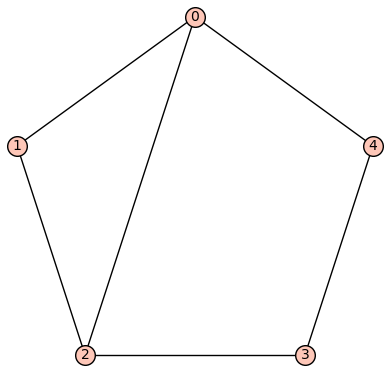

In [116]:
#creating parallel connection of cycles
m, n = 3, 4

def parallel_connection(m, n):
    G = graphs.CycleGraph(m + n - 2)
    G.add_edge(0, m-1)
    edge_e = frozenset({(0, m - 1)})
    G.show()
    return Matroid(G), edge_e

M, edge_e = parallel_connection(m, n)

In [125]:
#checking above result

def invKL(M):
    R = PolynomialRing(QQ, 'q')
    L = M.lattice_of_flats()
    if M.rank() == 0:
        return R(1)
    invKLpoly = sum((-1) ^ M.delete(M.groundset()-L[i]).rank() * 
                    M.delete(M.groundset()-L[i]).lattice_of_flats().kazhdan_lusztig_polynomial() * 
                    invKL(M.contract(L[i])) 
                    for i in range(1, len(M.lattice_of_flats())))
    return -invKLpoly
    
def kl(M):
    return M.lattice_of_flats().kazhdan_lusztig_polynomial()

invKL(M)

5*q + 6

In [157]:
def rhs(M, e):
    R = PolynomialRing(QQ, 'q')
    q = R.gen(0)
    contract_at_e = M.contract(e)
    delete_at_e = M.delete(e)
    L = M.lattice_of_flats()

    the_set_S = {F for F in L if e.issubset(F) and F - e in L}
    the_set_R = {F for F in L if e.issubset(F) and F - e not in L}
    the_set_R = the_set_R - {M.groundset()}
    print(the_set_S, the_set_R)

    S = sum((-1) ^ delete_at_e.contract(F-e).rank() *
            kl(delete_at_e.contract(F-e)) -
            (-1) ^ M.contract(F).rank() * invKL(M.delete(M.groundset() - F)) * kl(M.contract(F))
            for F in the_set_R)

    S2 = - sum((-1) ^ M.contract(F).rank() *
            kl(M.contract(F))
            for F in the_set_S)

    print(S, S2)

    return S + S2

def lhs(M, e):
    return invKL(M) - invKL(M.delete(e))

print(lhs(M, edge_e), rhs(M, edge_e))

{frozenset({(0, 2), (3, 4)}), frozenset({(2, 3), (0, 2)}), frozenset({(0, 2)}), frozenset({(0, 2), (0, 4)})} {frozenset({(0, 1), (0, 2), (1, 2), (2, 3)}), frozenset({(0, 1), (0, 2), (1, 2), (0, 4)}), frozenset({(2, 3), (0, 2), (0, 4), (3, 4)}), frozenset({(0, 1), (0, 2), (1, 2), (3, 4)}), frozenset({(0, 1), (0, 2), (1, 2)})}
2*q + 4 -2
2 2*q + 2


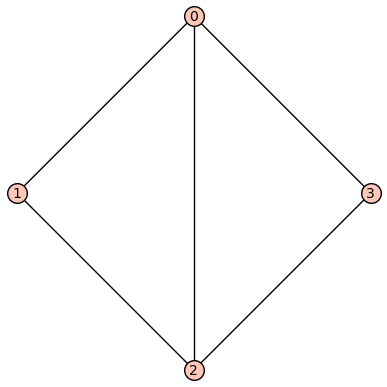

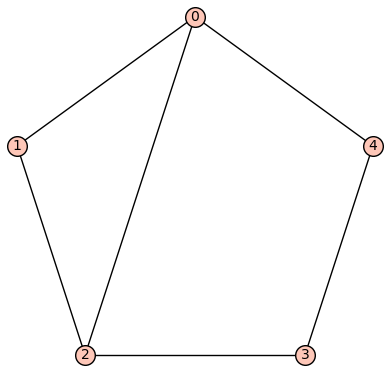

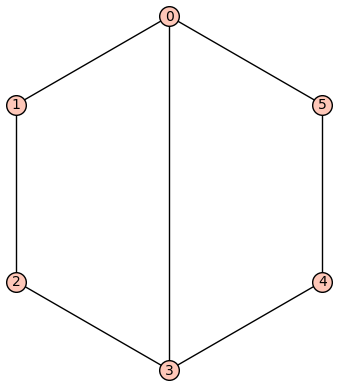

[(Graphic matroid of rank 3 on 5 elements, frozenset({(0, 2)})), (Graphic matroid of rank 4 on 6 elements, frozenset({(0, 2)})), (Graphic matroid of rank 5 on 7 elements, frozenset({(0, 3)}))]


,Matroid,invKL,lhs,rhs
0,"(Graphic matroid of rank 3 on 5 elements, ((0,...",q + 4,-q + 1,-q + 3
1,"(Graphic matroid of rank 4 on 6 elements, ((0,...",5*q + 6,2,3*q + 5
2,"(Graphic matroid of rank 5 on 7 elements, ((0,...",5*q^2 + 13*q + 9,4*q + 4,7*q + 8


In [128]:
# Create a list of matroids
tups = [(m, n) for m in range(3, 5) for n in range(m, 5)]
matroids_list = [parallel_connection(m, n) for m, n in tups]
print(matroids_list)

# Create a dataframe to store the results
import pandas as pd

data = {
    'Matroid': matroids_list,
    #'Kazhdan-Lusztig': [m.lattice_of_flats().kazhdan_lusztig_polynomial() for m in matroids_list],
    'invKL': [invKL(m) for (m, e) in matroids_list],
    'lhs': [lhs(m, e) for (m, e) in matroids_list],
    'rhs': [rhs(m, e) for (m, e) in matroids_list],
}

df = pd.DataFrame(data)
display(df)